In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 251213


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_os_random_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/oryza_sativa_test_202509/rice_random_gene_idmapping_all.tsv")
water_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_water")
needle_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/oryza_sativa_random_gene_list.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_hit_species_togoid_convert.tsv")

In [4]:
# Parameters
foldseek_result_tsv = "/tmp/jiv5slni/stgf99e3a20-4ed7-428a-a39b-4af37651e3f4/foldseek_sl_100genes_9606_stringent.tsv"
query_uniprot_idmapping_tsv = "/tmp/jiv5slni/stga2df0717-025a-45b0-b20f-57330c6c852e/sl_100_genes_idmapping_all.tsv"
water_result_dir_path = "/tmp/jiv5slni/stgbe6e2274-027d-496c-8e1b-660f06970abd/result_water"
needle_result_dir_path = "/tmp/jiv5slni/stga49de28d-85f2-4409-b4c5-d473f05e0b59/result_needle"
query_gene_list_tsv_path = "/tmp/jiv5slni/stg6636693a-d141-4ebc-b3f5-3cdcf0c3b564/solanum_lycopersicum_random_100genes_list.tsv"
togoid_convert_tsv_path = "/tmp/jiv5slni/stgf05e586c-93c1-4af4-8f1e-69140f0ab4a8/foldseek_hit_species_togoid_convert_stringent.tsv"


In [5]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
).with_columns(
    (pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession")), # "?" means non-greedy
    (pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit"))
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str
"""Solyc06g073620.3""","""A0A3Q7GZF1""","""O96007""",1.6100e-20,1.0,3,46.3,0.463,69,1,145,194,35,181,188,149,0.747,0.782,0.8606,0.6999,0.7218,0.7218,3.129,"""MADE----DRNLIEILEANSPIDFNKYIGY…","""DMDEVEEKSKDVINF-TA-EKLSVDEVSQL…",74,"""0.550,0.250,0.224,0.130,0.417,…"
"""Solyc06g073620.3""","""A0A3Q7GZF1""","""Q8NG50""",0.08158,0.214,4,14.0,0.14,14,34,130,194,1,93,284,100,0.5,0.327,0.2858,0.2373,0.1739,0.1739,11.47,"""AIATFAGTTRDTFDGKEVLELQYEAYVPMA…","""MAELVPFAV--PIESDKTLLVWELSSGPTA…",76,"""0.115,0.127,0.182,0.161,0.147,…"
"""Solyc06g073620.3""","""A0A3Q7GZF1""","""Q9BY77""",0.02075,0.214,7,8.8,0.088,13,52,194,194,282,390,421,147,0.737,0.259,0.3654,0.1741,0.09596,0.09596,20.72,"""LELQYEAYVPMAVRCLKSLCSSARSSWDIH…","""MTVNNLHPRVTEEDIVELFCVC----GALK…",92,"""0.209,0.212,0.170,0.198,0.241,…"
"""Solyc06g073620.3""","""A0A3Q7GZF1""","""Q01130""",0.06768,0.098,9,10.6,0.106,19,30,194,194,8,150,221,178,0.851,0.647,0.3122,0.1919,0.1751,0.1751,32.96,"""PKCGAIATFAGTTRDTFDGKEVLELQYEAY…","""PDVEGMTS--------------LKVDNLTY…",111,"""0.452,0.343,0.278,0.243,0.250,…"
"""Solyc06g073620.3""","""A0A3Q7GZF1""","""Q8N684""",0.03207,0.098,10,9.9,0.099,19,28,194,194,59,226,471,191,0.861,0.357,0.3047,0.167,0.08589,0.08589,27.33,"""SSPKCGAIATFAGTTRDTFDG--KEVLELQ…","""PSPKPNN---KTPAILYTYSGLRNRRAAVY…",125,"""0.067,0.071,0.202,0.185,0.097,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Solyc07g005210.3""","""Q38JE1""","""Q6JVE9""",0.0002223,1.0,15,14.2,0.142,26,1,157,185,3,161,175,183,0.849,0.909,0.4617,0.4896,0.5144,0.5144,13.7,"""MTTKEMEVVKNLDV-------------EKY…","""GAAEALPTVTVTLVAGAVPPASGALTAHCI…",107,"""1.000,0.750,0.404,0.368,0.304,…"
"""Solyc07g005210.3""","""Q38JE1""","""O95445""",0.002686,0.996,13,12.3,0.123,22,4,158,185,24,177,188,178,0.838,0.819,0.4182,0.4672,0.4606,0.4606,9.502,"""KEMEVVKNLDV------EKYMGRWYEIASF…","""PEHSQLTTLGVDGKEFPEVHLGQWYFIAGA…",109,"""0.263,0.259,0.287,0.304,0.320,…"
"""Solyc07g005210.3""","""Q38JE1""","""Q5VSP4""",0.001544,0.961,5,13.4,0.134,23,8,168,185,22,162,162,171,0.87,0.87,0.3735,0.305,0.3395,0.3395,17.83,"""VVKNLDVEKYMGRWYEIASFPSRNQPKDGV…","""LASDEEIQDVSGTWYLKA--MTVDRELPEM…",108,"""0.235,0.235,0.318,0.324,0.299,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

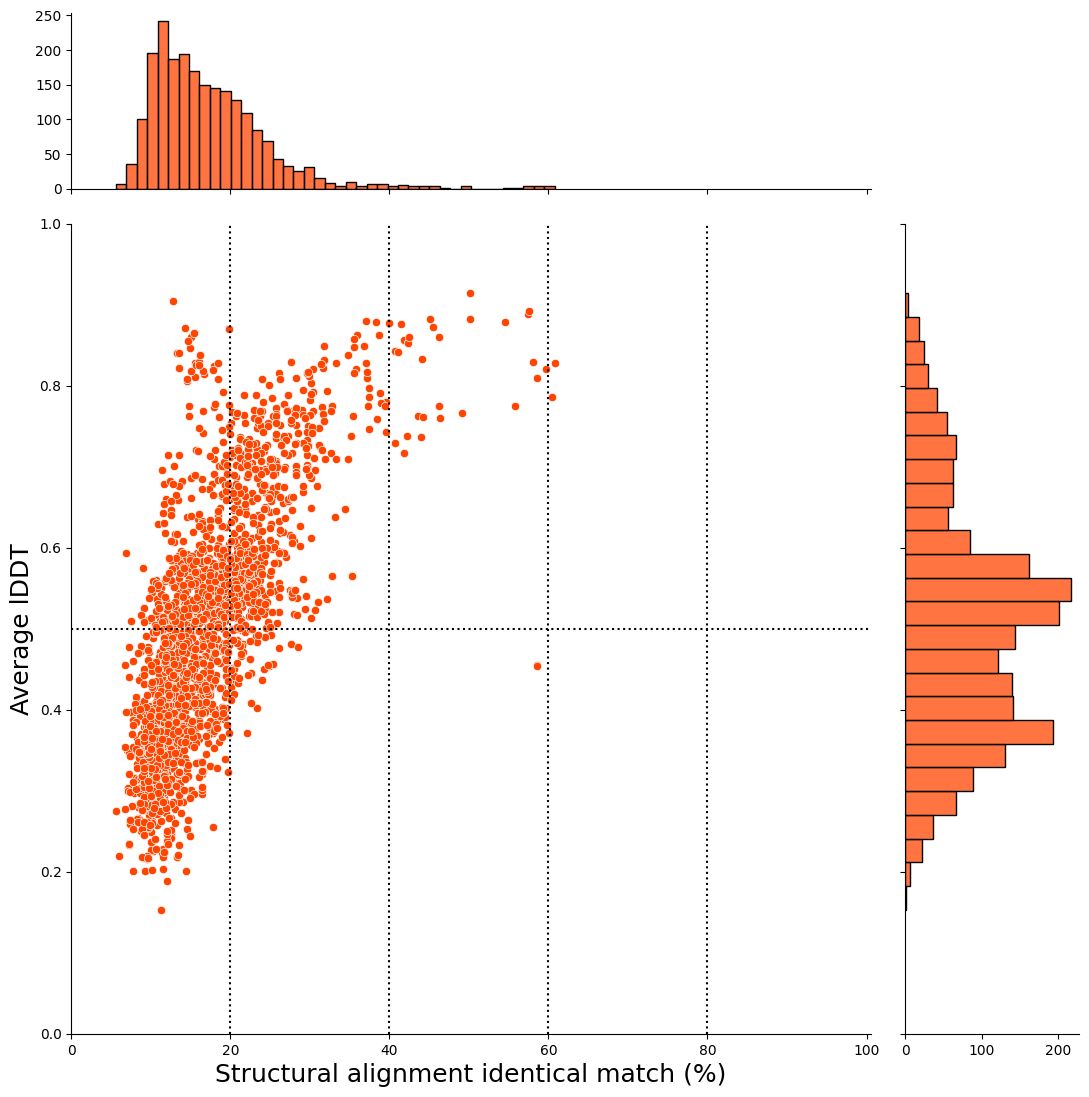

In [6]:
foldseek_filter_viz = foldseek_result.to_pandas()
sns.jointplot(
    data=foldseek_filter_viz,
    x="pident", # structural alignment identical match from foldseek result
    y="lddt",
    color="orangered",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Structural alignment identical match (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [7]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [8]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A3Q7E7M7""","""Q3MJ16""",346,"""71/346""",20.5,"""118/346""",34.1,"""130/346""",37.6,69.5
"""A0A3Q7E7M7""","""Q401N2""",254,"""50/254""",19.7,"""88/254""",34.6,"""76/254""",29.9,56.5
"""A0A3Q7E7M7""","""Q53TS8""",362,"""76/362""",21.0,"""118/362""",32.6,"""135/362""",37.3,65.0
"""A0A3Q7E7M7""","""Q5RHP9""",316,"""67/316""",21.2,"""115/316""",36.4,"""85/316""",26.9,69.5
"""A0A3Q7E7M7""","""Q6AWC2""",441,"""73/441""",16.6,"""155/441""",35.1,"""146/441""",33.1,62.0
…,…,…,…,…,…,…,…,…,…
"""Q38JE1""","""Q6UWW0""",186,"""42/186""",22.6,"""71/186""",38.2,"""36/186""",19.4,62.0
"""Q38JE1""","""Q6ZST4""",49,"""13/49""",26.5,"""19/49""",38.8,"""8/49""",16.3,23.5
"""Q38JE1""","""Q8WX39""",57,"""13/57""",22.8,"""22/57""",38.6,"""11/57""",19.3,39.5


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A3Q7E7M7""","""Q3MJ16""",1033,"""74/1033""",7.2,"""125/1033""",12.1,"""793/1033""",76.8,55.5
"""A0A3Q7E7M7""","""Q401N2""",542,"""73/542""",13.5,"""133/542""",24.5,"""267/542""",49.3,36.0
"""A0A3Q7E7M7""","""Q53TS8""",1892,"""103/1892""",5.4,"""167/1892""",8.8,"""1559/1892""",82.4,52.5
"""A0A3Q7E7M7""","""Q5RHP9""",1583,"""96/1583""",6.1,"""166/1583""",10.5,"""1231/1583""",77.8,51.0
"""A0A3Q7E7M7""","""Q6AWC2""",1268,"""84/1268""",6.6,"""174/1268""",13.7,"""939/1268""",74.1,51.0
…,…,…,…,…,…,…,…,…,…
"""Q38JE1""","""Q6UWW0""",217,"""42/217""",19.4,"""71/217""",32.7,"""65/217""",30.0,60.0
"""Q38JE1""","""Q6ZST4""",345,"""1/345""",0.3,"""3/345""",0.9,"""341/345""",98.8,6.0
"""Q38JE1""","""Q8WX39""",280,"""25/280""",8.9,"""46/280""",16.4,"""199/280""",71.1,16.0


In [9]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A0A3Q7E7M7""","""Q3MJ16""",346,1033,"""71/346""","""74/1033""",20.5,7.2,34.1,12.1,"""130/346""","""793/1033""",37.6,76.8,69.5,55.5
"""A0A3Q7E7M7""","""Q401N2""",254,542,"""50/254""","""73/542""",19.7,13.5,34.6,24.5,"""76/254""","""267/542""",29.9,49.3,56.5,36.0
"""A0A3Q7E7M7""","""Q53TS8""",362,1892,"""76/362""","""103/1892""",21.0,5.4,32.6,8.8,"""135/362""","""1559/1892""",37.3,82.4,65.0,52.5
"""A0A3Q7E7M7""","""Q5RHP9""",316,1583,"""67/316""","""96/1583""",21.2,6.1,36.4,10.5,"""85/316""","""1231/1583""",26.9,77.8,69.5,51.0
"""A0A3Q7E7M7""","""Q6AWC2""",441,1268,"""73/441""","""84/1268""",16.6,6.6,35.1,13.7,"""146/441""","""939/1268""",33.1,74.1,62.0,51.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Q38JE1""","""Q6UWW0""",186,217,"""42/186""","""42/217""",22.6,19.4,38.2,32.7,"""36/186""","""65/217""",19.4,30.0,62.0,60.0
"""Q38JE1""","""Q6ZST4""",49,345,"""13/49""","""1/345""",26.5,0.3,38.8,0.9,"""8/49""","""341/345""",16.3,98.8,23.5,6.0
"""Q38JE1""","""Q8WX39""",57,280,"""13/57""","""25/280""",22.8,8.9,38.6,16.4,"""11/57""","""199/280""",19.3,71.1,39.5,16.0


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [10]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(join_foldseek.head())

shape: (1_997, 41)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ K4CRI8      ┆ Q9H7Z7     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ A0A3Q7H791  ┆ Q8IVL1     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ A0A3Q7J846  ┆ Q96L50     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ A0A3Q7FXJ2  ┆ P28482     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1         

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Solyc09g011620.1""","""K4CRI8""","""Q9H7Z7""",0.0001922,1.0,15,13.7,0.137,40,3,198,215,101,376,377,291,0.912,0.732,0.5061,0.5742,0.3551,0.3551,9.196,"""DVKLLGLWYSPFSHRVEWALKIKGVQYEFI…","""QLTLYQYKTCPFCSKVRAFLDFHALPYQVV…",141,"""0.692,0.729,0.759,0.826,0.819,…",131,385,"""25/131""","""48/385""",19.1,12.5,45.8,26.8,"""21/131""","""178/385""",16.0,46.2,63.0,43.0
"""Solyc07g023990.2""","""A0A3Q7H791""","""Q8IVL1""",0.01914,0.772,15,9.8,0.098,27,2,238,255,2139,2354,2488,274,0.929,0.087,0.3978,0.3598,0.05047,0.05047,13.19,"""LLDEQRQALGLKVGARRPPHMAFLGNPGTG…","""ILQRYVSLLI------EHRRIILSGPSGTG…",152,"""0.380,0.488,0.490,0.406,0.513,…",143,2552,"""33/143""","""57/2552""",23.1,2.2,36.4,3.9,"""45/143""","""2361/2552""",31.5,92.5,66.5,54.5
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q96L50""",0.001577,1.0,14,19.7,0.197,48,89,303,396,153,366,414,243,0.543,0.517,0.4716,0.3183,0.3054,0.3054,15.3,"""PNSIKYFFISHNNLTEEISSSICNLTSLVM…","""PYSLEHLQTSYCGLV-RVDMRMLCLKSLRK…",138,"""0.404,0.530,0.471,0.491,0.578,…",279,577,"""74/279""","""78/577""",26.5,13.5,37.6,19.2,"""61/279""","""344/577""",21.9,59.6,125.0,111.5
"""Solyc04g012180.3""","""A0A3Q7FXJ2""","""P28482""",0.001202,1.0,3,18.6,0.186,19,4,100,351,78,173,360,102,0.276,0.267,0.7011,0.2409,0.2351,0.2351,2.575,"""VRHKNLVPVITTCSSDCI-----RAFILQF…","""FRHENIIGINDIIRAPTIEQMKDVYIVQDL…",72,"""0.605,0.713,0.790,0.815,0.862,…",319,462,"""71/319""","""69/462""",22.3,14.9,39.5,27.5,"""75/319""","""213/462""",23.5,46.1,93.5,85.5
"""Solyc04g012180.3""","""A0A3Q7FXJ2""","""P27037""",0.001064,1.0,5,25.9,0.259,33,1,115,351,238,362,513,127,0.328,0.244,0.6991,0.2884,0.2016,0.2016,3.043,"""MRNVRHKNLVPVI--TTCSSDCIRA--FIL…","""LPGMKHENILQFIGAEKRGTSVDVDLWLIT…",80,"""0.448,0.347,0.500,0.744,0.731,…",351,621,"""77/351""","""79/621""",21.9,12.7,36.5,21.3,"""116/351""","""378/621""",33.0,60.9,133.0,130.5


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Create Scatter Plot for all hits (x-axis: Similarity_percent_needle) Global alignment

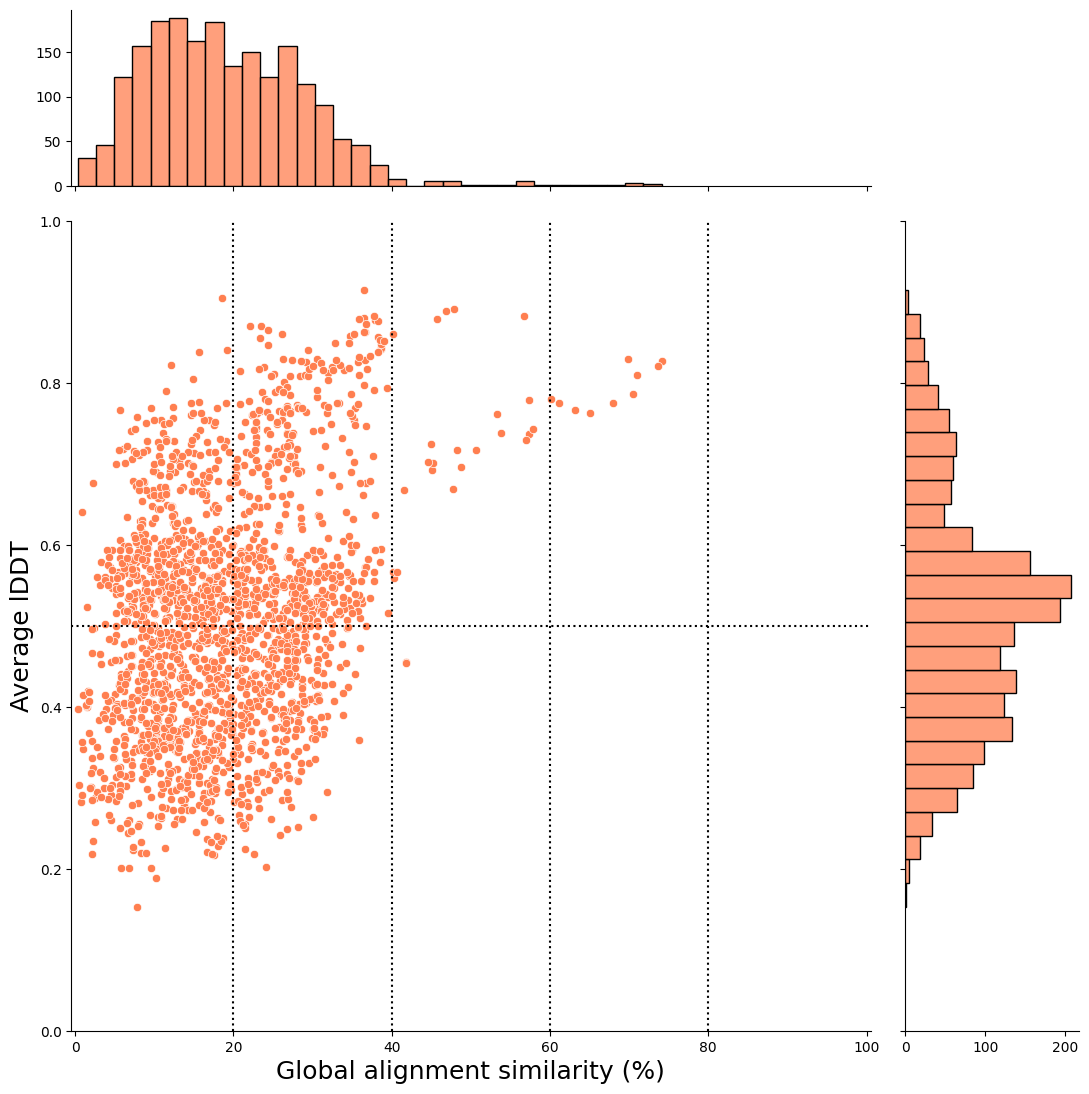

In [11]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;


## Create Scatter Plot for all hits (x-axis: Similarity_percent_water) Local Alignment

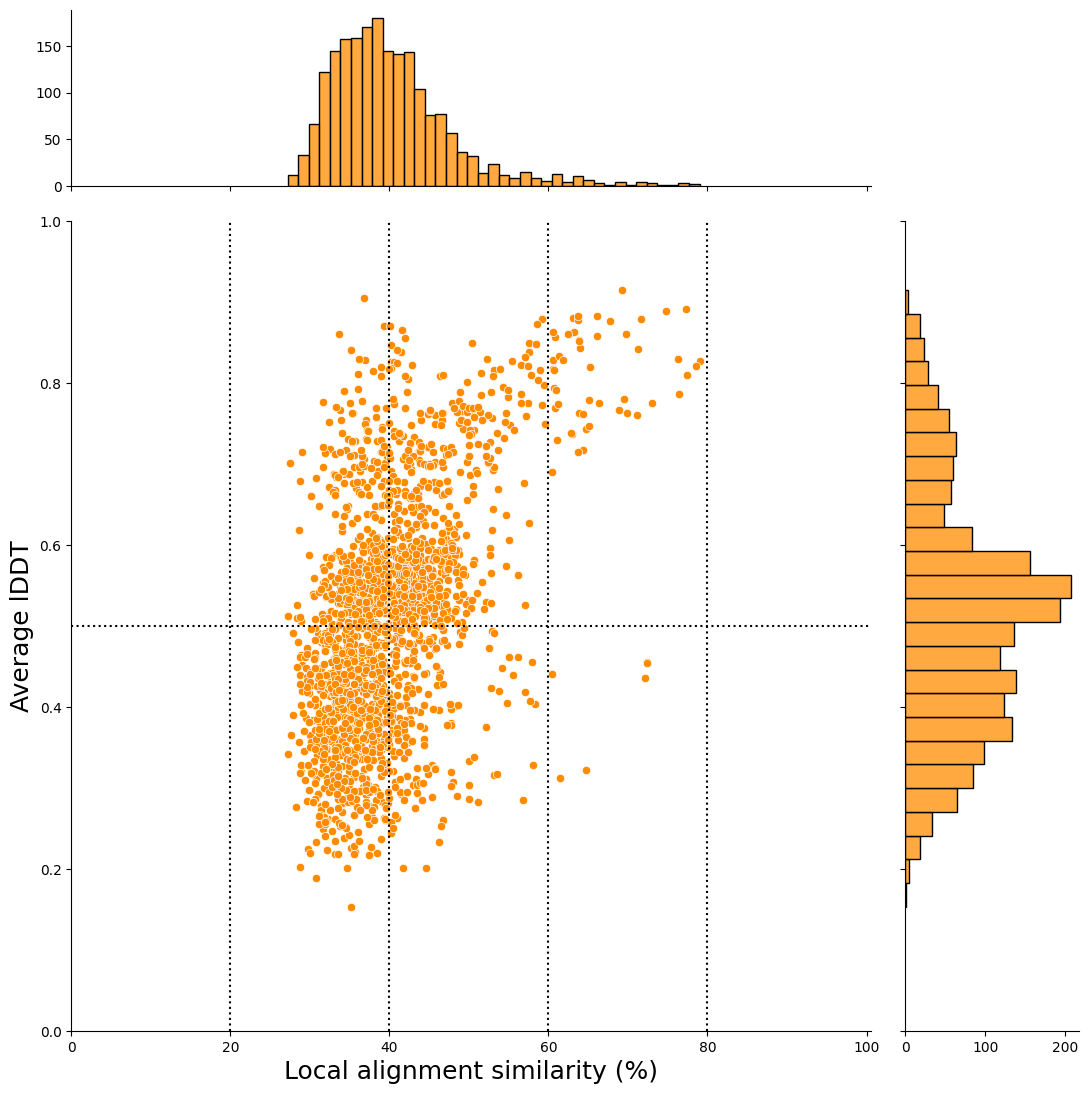

In [12]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_water", # local alignment similarity
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Counting foldseek hits in Gene level

In [13]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From", maintain_order=True).agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""Solyc04g012180.3""",385,false
"""Solyc06g072800.3""",318,false
"""Solyc09g018060.3""",259,false
"""Solyc06g034200.1""",143,false
"""Solyc12g036793.1""",137,false
…,…,…
"""Solyc08g075890.3""",0,true
"""ENSRNA050028677""",0,true
"""Solyc08g014390.1""",0,true


&nbsp;

&nbsp;

&nbsp;

# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- alignment coverage >= 0.5

In [14]:
condition1 = join_foldseek.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).sort(
        by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession
        descending=[False, False, False]
    )

condition1_rm = condition1.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition1.group_by(["From"], maintain_order=True).n_unique())
display(condition1)

shape: (33, 41)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Solyc00g05 ┆ 1          ┆ 33        ┆ 33     ┆ … ┆ 30        ┆ 32        ┆ 30        ┆ 28        │
│ 0130.1     ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Solyc00g13 ┆ 1          ┆ 11        ┆ 10     ┆ … ┆ 11        ┆ 11        

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Solyc00g050130.1""","""A0A494G9G7""","""O60656""",4.8930e-11,1.0,35,12.6,0.126,67,6,457,460,21,463,530,529,0.983,0.836,0.4407,0.547,0.4836,0.4836,9.547,"""SSVLNEVTVAMVPWPEHGHLNPLFLLSRFI…","""GFAEAGK-LLVVPMDGS-HWFTMRSVVEKL…",299,"""0.202,0.337,0.296,0.462,0.299,…",464,672,"""89/464""","""97/672""",19.2,14.4,30.0,22.8,"""188/464""","""354/672""",40.5,52.7,125.5,102.0
"""Solyc00g050130.1""","""A0A494G9G7""","""O75310""",8.4390e-12,1.0,37,13.8,0.138,74,6,458,460,19,465,529,536,0.985,0.845,0.4143,0.5242,0.4632,0.4632,10.56,"""SSVLNEVTVAMVPWPEHGHLNPLFLLSRFI…","""SSGSCGKVLVWAAEYSH-----WMNMKTIL…",290,"""0.369,0.391,0.343,0.487,0.427,…",194,599,"""48/194""","""102/599""",24.7,17.0,39.2,30.7,"""55/194""","""209/599""",28.4,34.9,155.0,114.0
"""Solyc00g050130.1""","""A0A494G9G7""","""O75795""",2.2530e-11,1.0,38,15.5,0.155,83,5,456,460,18,469,530,535,0.983,0.853,0.4132,0.5468,0.4824,0.4824,10.23,"""NSSVLNEVTVAMVPWPEHGHLNPLFLLSRF…","""FSSGSCGKVLVWPTEYSHW-INMKTILEEL…",286,"""0.236,0.298,0.380,0.324,0.442,…",193,612,"""47/193""","""102/612""",24.4,16.7,38.3,30.6,"""53/193""","""234/612""",27.5,38.2,152.5,117.0
"""Solyc00g050130.1""","""A0A494G9G7""","""P06133""",1.5260e-10,1.0,39,15.1,0.151,81,6,456,460,19,468,528,534,0.98,0.852,0.4266,0.5456,0.4833,0.4833,10.14,"""SSVLNEVTVAMVPWPEHGHLNPLFLLSRFI…","""SSGSCGK-VLVWPTEFSHWMNIKTILDELV…",286,"""0.274,0.326,0.278,0.455,0.348,…",470,600,"""104/470""","""110/600""",22.1,18.3,38.3,31.5,"""107/470""","""212/600""",22.8,35.3,164.0,150.5
"""Solyc00g050130.1""","""A0A494G9G7""","""P0DTE4""",4.6050e-7,1.0,37,13.8,0.138,77,5,456,460,15,466,527,555,0.983,0.858,0.3352,0.4334,0.3847,0.3847,19.17,"""NSSVLNEVTVAMVPWPEHGHLNPLFLLSRF…","""IGTTLGGN-VLIWPMEGSHWLNVKIIIDEL…",272,"""0.222,0.274,0.359,0.315,0.468,…",487,613,"""102/487""","""104/613""",20.9,17.0,35.9,30.3,"""127/487""","""239/613""",26.1,39.0,141.5,126.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q9BZR6""",0.0009049,0.998,25,15.2,0.152,59,25,396,396,57,345,473,388,0.939,0.611,0.3855,0.3379,0.2914,0.2914,21.85,"""SHLQRLDLSSNNFSNSHIP-PEFSKFSRLT…","""AASQRIFLHGNRIS--HVPAASFRACRNLT…",214,"""0.312,0.408,0.375,0.339,0.304,…",240,542,"""57/240""","""93/542""",23.8,17.2,35.0,26.6,"""67/240""","""215/542""",27.9,39.7,83.0,43.0
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q9GZU5""",0.000008,1.0,21,17.1,0.171,72,26,395,396,82,456,476,419,0.934,0.788,0.4258,0.4394,0.3736,0.3736,23.73,"""HLQRLDLSSNNFSNSHIPPEFSKFSRLTHL…","""SLRRLSLRHNNLS-FITPGAFKGLPRLAEL…",254,"""0.567,0.525,0.512,0.529,0.457,…",251,539,"""65/251""","""85/539""",25.9,15.8,37.8,25.4,"""66/251""","""206/539""",26.3,38.2,115.5,87.0
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q9HBL6""",0.003801,0.984,15,15.1,0.151,47,95,378,396,55,289,345,310,0.717,0.681,0.3743,0.2663,0.2973,0.2973,16.31,"""FFISHNNLTEEISSSICNLTSLVMLDLSRN…","""LHLQDNQIHHLPAFAFRSVPWLMTLNLSNN…",162,"""0.385,0.341,0.339,0.372,0.377,…",232,463,"""57/232""","""85/463""",24.6,18.4,40.9,30.2,"""70/232""","""185/463""",30.2,40.0,128.5,83.5


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Filtering Condition2

- If there are hits with the same target for the same gene-derived UniProt ID, the one with the highest qcov is selected, and if the qcov is the same, the one with the highest lDDT is selected.
- **Note that in this study, we leave the states with the same foldseek hit even if the rice genes are different.**

In [15]:
condition2 = condition1.sort(
    by=["qcov", "lddt"],
    descending=[True, True]
).group_by(
    ["From", "foldseek hit"],
    maintain_order=True
).agg(
    pl.all().first()
).sort(
    by=["From", "UniProt Accession", "foldseek hit"],
    descending=[False, False, False]
).select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "evalue",
    "prob",
    "gapopen",
    "pident",
    "fident",
    "nident",
    "qstart",
    "qend",
    "qlen",
    "tstart",
    "tend",
    "tlen",
    "alnlen",
    "qcov",
    "tcov",
    "lddt",
    "qtmscore",
    "ttmscore",
    "alntmscore",
    "rmsd",
    "mismatch",
    "Length_water",
    "Length_needle",
    "Identity_water",
    "Identity_needle",
    "Identity_percent_water",
    "Identity_percent_needle",
    "Similarity_percent_water",
    "Similarity_percent_needle",
    "Gaps_water",
    "Gaps_percent_water",
    "Gaps_needle",
    "Gaps_percent_needle",
    "Score_water",
    "Score_needle"
)

display(condition2)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,mismatch,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,str,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Solyc00g050130.1""","""A0A494G9G7""","""O60656""",4.8930e-11,1.0,35,12.6,0.126,67,6,457,460,21,463,530,529,0.983,0.836,0.4407,0.547,0.4836,0.4836,9.547,299,464,672,"""89/464""","""97/672""",19.2,14.4,30.0,22.8,"""188/464""",40.5,"""354/672""",52.7,125.5,102.0
"""Solyc00g050130.1""","""A0A494G9G7""","""O75310""",8.4390e-12,1.0,37,13.8,0.138,74,6,458,460,19,465,529,536,0.985,0.845,0.4143,0.5242,0.4632,0.4632,10.56,290,194,599,"""48/194""","""102/599""",24.7,17.0,39.2,30.7,"""55/194""",28.4,"""209/599""",34.9,155.0,114.0
"""Solyc00g050130.1""","""A0A494G9G7""","""O75795""",2.2530e-11,1.0,38,15.5,0.155,83,5,456,460,18,469,530,535,0.983,0.853,0.4132,0.5468,0.4824,0.4824,10.23,286,193,612,"""47/193""","""102/612""",24.4,16.7,38.3,30.6,"""53/193""",27.5,"""234/612""",38.2,152.5,117.0
"""Solyc00g050130.1""","""A0A494G9G7""","""P06133""",1.5260e-10,1.0,39,15.1,0.151,81,6,456,460,19,468,528,534,0.98,0.852,0.4266,0.5456,0.4833,0.4833,10.14,286,470,600,"""104/470""","""110/600""",22.1,18.3,38.3,31.5,"""107/470""",22.8,"""212/600""",35.3,164.0,150.5
"""Solyc00g050130.1""","""A0A494G9G7""","""P0DTE4""",4.6050e-7,1.0,37,13.8,0.138,77,5,456,460,15,466,527,555,0.983,0.858,0.3352,0.4334,0.3847,0.3847,19.17,272,487,613,"""102/487""","""104/613""",20.9,17.0,35.9,30.3,"""127/487""",26.1,"""239/613""",39.0,141.5,126.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q9BZR6""",0.0009049,0.998,25,15.2,0.152,59,25,396,396,57,345,473,388,0.939,0.611,0.3855,0.3379,0.2914,0.2914,21.85,214,240,542,"""57/240""","""93/542""",23.8,17.2,35.0,26.6,"""67/240""",27.9,"""215/542""",39.7,83.0,43.0
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q9GZU5""",0.000008,1.0,21,17.1,0.171,72,26,395,396,82,456,476,419,0.934,0.788,0.4258,0.4394,0.3736,0.3736,23.73,254,251,539,"""65/251""","""85/539""",25.9,15.8,37.8,25.4,"""66/251""",26.3,"""206/539""",38.2,115.5,87.0
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q9HBL6""",0.003801,0.984,15,15.1,0.151,47,95,378,396,55,289,345,310,0.717,0.681,0.3743,0.2663,0.2973,0.2973,16.31,162,232,463,"""57/232""","""85/463""",24.6,18.4,40.9,30.2,"""70/232""",30.2,"""185/463""",40.0,128.5,83.5


&nbsp;

&nbsp;

&nbsp;

## Filtering Condition3

- Select hits that can be converted to Ensembl gene id and HGNC Gene nomenclature with TogoID API
- https://togoid.dbcls.jp/

In [16]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).sort(
    by=["foldseek hit"],
    descending=[False]
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A087WUL8""","""ENSP00000498781""","""ENST00000651566""","""ENSG00000271383""",31999,"""NBPF19"""
"""A0A1W2PR19""","""ENSP00000492273""","""ENST00000621179""","""ENSG00000276950""",26930,"""GSTT4"""
"""A0A1W2PRG0""","""ENSP00000492227""","""ENST00000625476""","""ENSG00000281310""",33606,"""GSTTP2"""
"""A0AVI2""","""ENSP00000485238""","""ENST00000624922""","""ENSG00000249715""",19044,"""FER1L5"""
"""A0PJZ3""","""ENSP00000374268""","""ENST00000389617""","""ENSG00000172986""",33383,"""GXYLT2"""
…,…,…,…,…,…
"""Q9Y6V0""","""ENSP00000334319""","""ENST00000333891""","""ENSG00000186472""",13406,"""PCLO"""
"""Q9Y6V0""","""ENSP00000388393""","""ENST00000423517""","""ENSG00000186472""",13406,"""PCLO"""
"""Q9Y6V0""","""ENSP00000482390""","""ENST00000618073""","""ENSG00000186472""",13406,"""PCLO"""


In [17]:
condition3 = condition2.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).drop(
    [
        "ensembl_transcript_id",
        "hgnc_id"
    ]
).filter( 
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).select(
    [
        "From",
        "UniProt Accession",
        "foldseek hit",
        "ensembl_protein_id",
        "ensembl_gene_id",
        "hgnc_symbol_id",
        "evalue",
        "prob",
        "gapopen",
        "pident",
        "fident",
        "nident",
        "qstart",
        "qend",
        "qlen",
        "tstart",
        "tend",
        "tlen",
        "alnlen",
        "mismatch",
        "qcov",
        "tcov",
        "rmsd",
        "lddt",
        "qtmscore",
        "ttmscore",
        "alntmscore",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_percent_water",
        "Gaps_needle",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
).sort(
    by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession (change order)
    descending=[False, False, False]
)



print(condition3.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(condition3)


shape: (820, 40)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ From      ┆ UniProt   ┆ foldseek  ┆ ensembl_p ┆ … ┆ Gaps_need ┆ Gaps_perc ┆ Score_wat ┆ Score_ne │
│ ---       ┆ Accession ┆ hit       ┆ rotein_id ┆   ┆ le        ┆ ent_needl ┆ er        ┆ edle     │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆ u32       ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32      │
│           ┆           ┆           ┆           ┆   ┆           ┆ u32       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Solyc00g0 ┆ A0A494G9G ┆ O60656    ┆ 1         ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1        │
│ 50130.1   ┆ 7         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Solyc00g0 ┆ A0A494G9G ┆ O75310    ┆ 1         ┆ … ┆ 1         ┆ 1       

From,UniProt Accession,foldseek hit,ensembl_protein_id,ensembl_gene_id,hgnc_symbol_id,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,mismatch,qcov,tcov,rmsd,lddt,qtmscore,ttmscore,alntmscore,Length_water,Length_needle,Identity_water,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Solyc00g050130.1""","""A0A494G9G7""","""O60656""","""ENSP00000346768""","""ENSG00000241119""","""UGT1A9""",4.8930e-11,1.0,35,12.6,0.126,67,6,457,460,21,463,530,529,299,0.983,0.836,9.547,0.4407,0.547,0.4836,0.4836,464,672,"""89/464""",19.2,14.4,30.0,22.8,"""188/464""",40.5,"""354/672""",52.7,125.5,102.0
"""Solyc00g050130.1""","""A0A494G9G7""","""O75310""","""ENSP00000387683""","""ENSG00000213759""","""UGT2B11""",8.4390e-12,1.0,37,13.8,0.138,74,6,458,460,19,465,529,536,290,0.985,0.845,10.56,0.4143,0.5242,0.4632,0.4632,194,599,"""48/194""",24.7,17.0,39.2,30.7,"""55/194""",28.4,"""209/599""",34.9,155.0,114.0
"""Solyc00g050130.1""","""A0A494G9G7""","""O75795""","""ENSP00000320401""","""ENSG00000197888""","""UGT2B17""",2.2530e-11,1.0,38,15.5,0.155,83,5,456,460,18,469,530,535,286,0.983,0.853,10.23,0.4132,0.5468,0.4824,0.4824,193,612,"""47/193""",24.4,16.7,38.3,30.6,"""53/193""",27.5,"""234/612""",38.2,152.5,117.0
"""Solyc00g050130.1""","""A0A494G9G7""","""P06133""","""ENSP00000305221""","""ENSG00000156096""","""UGT2B4""",1.5260e-10,1.0,39,15.1,0.151,81,6,456,460,19,468,528,534,286,0.98,0.852,10.14,0.4266,0.5456,0.4833,0.4833,470,600,"""104/470""",22.1,18.3,38.3,31.5,"""107/470""",22.8,"""212/600""",35.3,164.0,150.5
"""Solyc00g050130.1""","""A0A494G9G7""","""P06133""","""ENSP00000421290""","""ENSG00000156096""","""UGT2B4""",1.5260e-10,1.0,39,15.1,0.151,81,6,456,460,19,468,528,534,286,0.98,0.852,10.14,0.4266,0.5456,0.4833,0.4833,470,600,"""104/470""",22.1,18.3,38.3,31.5,"""107/470""",22.8,"""212/600""",35.3,164.0,150.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q9UQ13""","""ENSP00000510554""","""ENSG00000108061""","""SHOC2""",0.000001,1.0,17,18.7,0.187,63,18,267,396,139,454,582,336,167,0.631,0.543,7.55,0.4578,0.3666,0.2673,0.2673,337,645,"""92/337""",27.3,17.2,43.0,26.8,"""61/337""",18.1,"""312/645""",48.4,205.0,192.5
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q9UQ13""","""ENSP00000510210""","""ENSG00000108061""","""SHOC2""",0.000001,1.0,17,18.7,0.187,63,18,267,396,139,454,582,336,167,0.631,0.543,7.55,0.4578,0.3666,0.2673,0.2673,337,645,"""92/337""",27.3,17.2,43.0,26.8,"""61/337""",18.1,"""312/645""",48.4,205.0,192.5
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q9UQ13""","""ENSP00000358464""","""ENSG00000108061""","""SHOC2""",0.000001,1.0,17,18.7,0.187,63,18,267,396,139,454,582,336,167,0.631,0.543,7.55,0.4578,0.3666,0.2673,0.2673,337,645,"""92/337""",27.3,17.2,43.0,26.8,"""61/337""",18.1,"""312/645""",48.4,205.0,192.5


&nbsp;

&nbsp;


In [18]:
foldseek_filter_viz = condition3.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(foldseek_filter_viz)

shape: (820, 11)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_ ┆ Similarit ┆ Similarit │
│ ---        ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ percent_w ┆ y_percent ┆ y_percent │
│ str        ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ ater      ┆ _needle   ┆ _water    │
│            ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ u32        ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ Solyc00g05 ┆ A0A494G9G7 ┆ Q9HAW9     ┆ 1    ┆ … ┆ 1          ┆ 1         ┆ 1         ┆ 1         │
│ 0130.1     ┆            ┆            ┆      ┆   ┆            ┆           ┆           ┆           │
│ Solyc00g05 ┆ A0A494G9G7 ┆ Q6UWM9     ┆ 1    ┆ … ┆ 1          ┆ 1        

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""Solyc00g050130.1""","""A0A494G9G7""","""Q9HAW9""",0.983,0.836,7.256,0.4652,14.1,18.6,22.9,29.6
"""Solyc00g050130.1""","""A0A494G9G7""","""Q6UWM9""",0.987,0.852,9.183,0.4465,17.0,20.2,30.6,37.1
"""Solyc00g050130.1""","""A0A494G9G7""","""Q495W5""",0.761,0.522,10.87,0.277,12.5,20.9,21.8,37.4
"""Solyc00g050130.1""","""A0A494G9G7""","""P35503""",0.98,0.822,9.542,0.4386,16.5,21.3,27.9,31.1
"""Solyc00g050130.1""","""A0A494G9G7""","""P54855""",0.98,0.851,8.769,0.4744,17.2,24.9,32.2,38.3
…,…,…,…,…,…,…,…,…,…,…
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q6UY18""",0.636,0.521,7.262,0.4277,16.2,22.7,23.2,31.7
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q9BZR6""",0.939,0.611,21.85,0.3855,17.2,23.8,26.6,35.0
"""Solyc12g036793.1""","""A0A3Q7J846""","""Q99983""",0.619,0.506,5.056,0.5279,14.4,20.6,25.1,33.8


<Figure size 4000x4000 with 0 Axes>

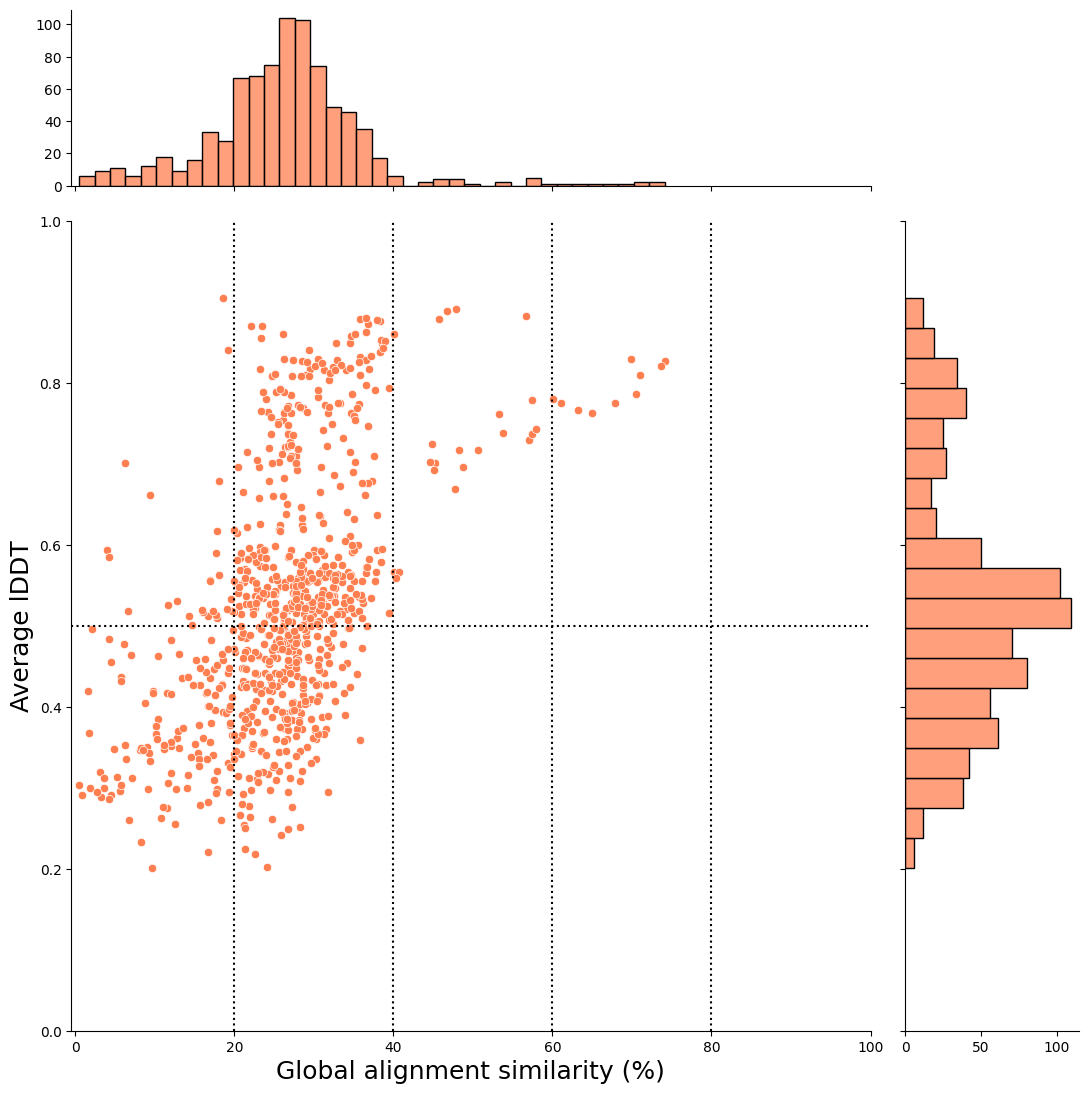

In [19]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

<Figure size 4000x4000 with 0 Axes>

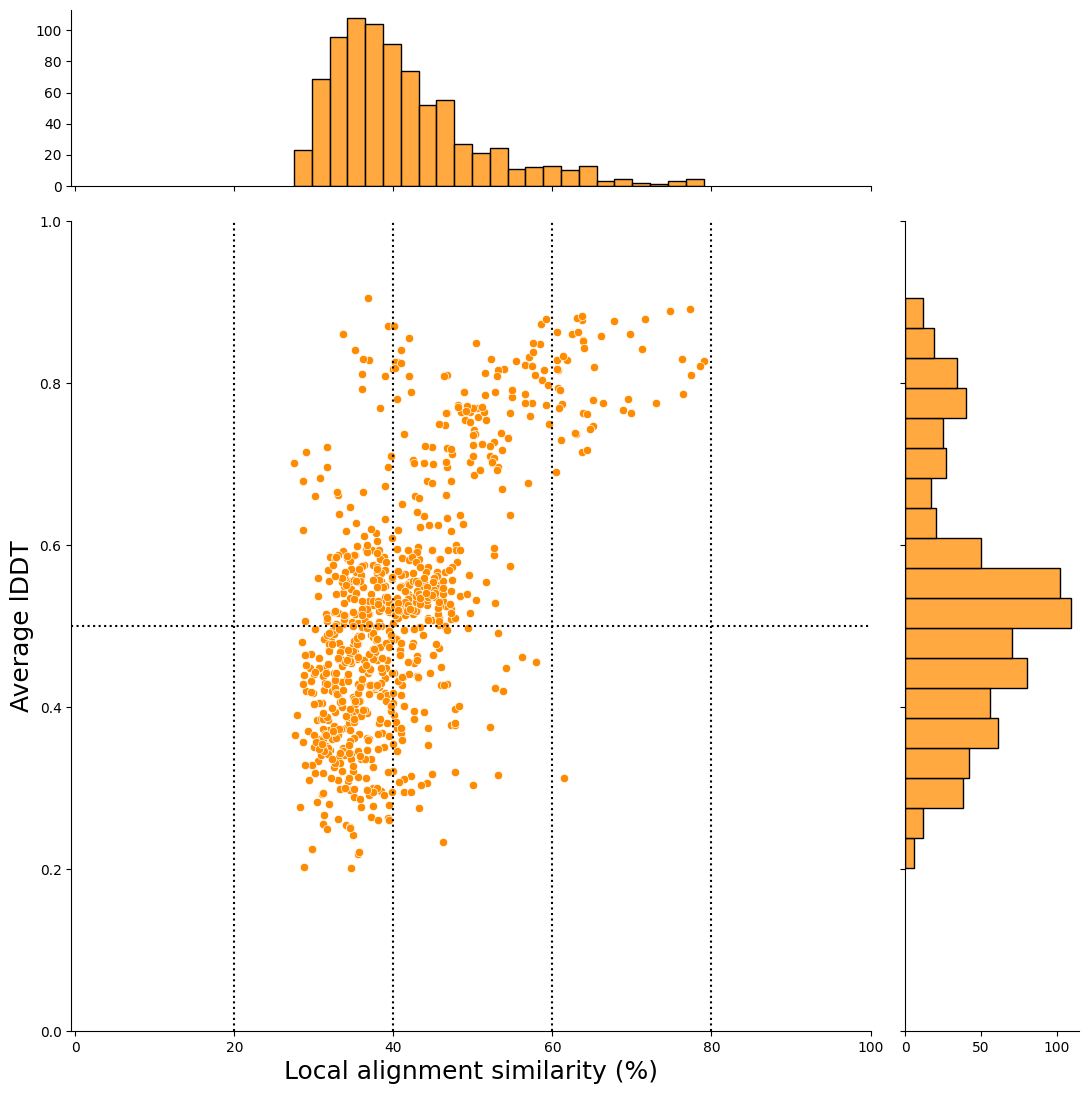

In [20]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_water",
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")

plt.axhline(y=0.5, color="black", linestyle=":")
plt.show()

&nbsp;

&nbsp;
